In [29]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt


In [30]:
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# encoding data types


In [ ]:
# train dataset

## Gender to binary
train['Gender'] = train['Gender'].map({'Male': 0, 'Female': 1})

## family_history_with_overweight to binary
train['family_history_with_overweight'] = train['family_history_with_overweight'].map({'no': 0, 'yes': 1})

## FAVC to binary
train['FAVC'] = train['FAVC'].map({'no': 0, 'yes': 1})

## CAEC to ordinal
train['CAEC'] = train['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

## SMOKE to binary
train['SMOKE'] = train['SMOKE'].map({'no': 0, 'yes': 1})

## SCC to binary
train['SCC'] = train['SCC'].map({'no': 0, 'yes': 1})

## CALC to ordinal
train['CALC'] = train['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

## MTRANS to ordinal
train['MTRANS'] = train['MTRANS'].map({'Public_Transportation': 0, 'Automobile': 1, 'Motorbike': 2, 'Bike': 3, 'Walking': 4})

## NObeyesdad to ordinal
train['NObeyesdad'] = train['NObeyesdad'].map({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})

In [34]:
# separate the data into features and target variable
X = train.drop('NObeyesdad', axis=1)
y = train['NObeyesdad']

In [86]:
# test dataset

## Gender to binary
test['Gender'] = test['Gender'].map({'Male': 0, 'Female': 1})

## family_history_with_overweight to binary
test['family_history_with_overweight'] = test['family_history_with_overweight'].map({'no': 0, 'yes': 1})

## FAVC to binary
test['FAVC'] = test['FAVC'].map({'no': 0, 'yes': 1})

## CAEC to ordinal
test['CAEC'] = test['CAEC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

## SMOKE to binary
test['SMOKE'] = test['SMOKE'].map({'no': 0, 'yes': 1})

## SCC to binary
test['SCC'] = test['SCC'].map({'no': 0, 'yes': 1})

## CALC to ordinal
test['CALC'] = test['CALC'].map({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3})

## MTRANS to ordinal
test['MTRANS'] = test['MTRANS'].map({'Public_Transportation': 0, 'Automobile': 1, 'Motorbike': 2, 'Bike': 3, 'Walking': 4})

## Without standardization

In [76]:
# Split the data into train and test sets
# 0.2 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 0.3 test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## With Standardization

In [78]:
X_st = X.copy()

# convert column types from object to numeric
X_st = X_st.apply(pd.to_numeric, errors='coerce')
X_st.info()

# Standardize the features
scaler = StandardScaler()
X_st = scaler.fit_transform(X_st)

# Split the data into train and test sets
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_st, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  int64  
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  int64  
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

# Logistic Regression
- 85%

In [27]:
# Create and train logistic regression model
lreg = LogisticRegression(max_iter=1000)
lreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lreg.predict(X_test)

# Evaluate the lreg
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.36801541425818884
Confusion Matrix:
 [[223 233   0  51  17   0   0]
 [ 97 284   0 108 112  18   7]
 [ 56 129   1  46 130  69  53]
 [ 59  99   0  79 123  82  72]
 [ 52  24   0  39  96 125 207]
 [  1   3   0  38  71 273 271]
 [  0   0   0   0   1 231 572]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.43      0.44       524
           1       0.37      0.45      0.41       626
           2       1.00      0.00      0.00       484
           3       0.22      0.15      0.18       514
           4       0.17      0.18      0.18       543
           5       0.34      0.42      0.38       657
           6       0.48      0.71      0.58       804

    accuracy                           0.37      4152
   macro avg       0.43      0.33      0.31      4152
weighted avg       0.43      0.37      0.33      4152



c:\Users\gangt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# with multi class

# create a logistic regression model
lreg2 = LogisticRegression(max_iter=1000, multi_class='multinomial')

# fit the lreg2 to the training data
lreg2.fit(X_train, y_train)

# make predictions on the test data
y_pred = lreg2.predict(X_test)  

# print the accuracy score
print(accuracy_score(y_test, y_pred))

# print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# print the classification report
print(classification_report(y_test, y_pred))

0.36801541425818884
[[223 233   0  51  17   0   0]
 [ 97 284   0 108 112  18   7]
 [ 56 129   1  46 130  69  53]
 [ 59  99   0  79 123  82  72]
 [ 52  24   0  39  96 125 207]
 [  1   3   0  38  71 273 271]
 [  0   0   0   0   1 231 572]]
              precision    recall  f1-score   support

           0       0.46      0.43      0.44       524
           1       0.37      0.45      0.41       626
           2       1.00      0.00      0.00       484
           3       0.22      0.15      0.18       514
           4       0.17      0.18      0.18       543
           5       0.34      0.42      0.38       657
           6       0.48      0.71      0.58       804

    accuracy                           0.37      4152
   macro avg       0.43      0.33      0.31      4152
weighted avg       0.43      0.37      0.33      4152



c:\Users\gangt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


with or without the multinomial, the result is the same

### hyper tuning: the best max_iter value based on accuracy

c:\Users\gangt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\gangt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

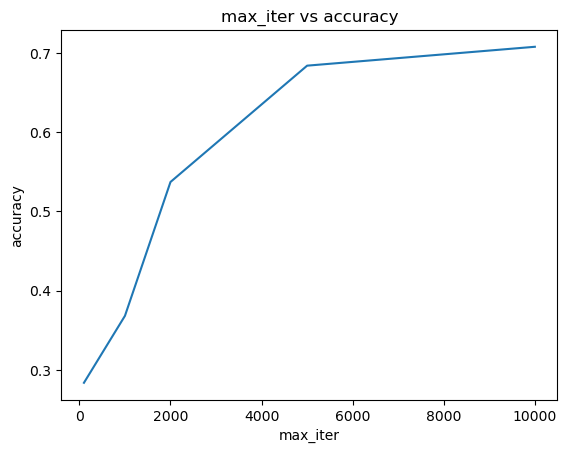

In [30]:
max_iter = [100, 1000, 2000, 5000, 10000]
accuracy = []

for i in max_iter:
    lreg = LogisticRegression(max_iter=i)
    lreg.fit(X_train, y_train)
    y_pred = lreg.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(max_iter, accuracy)
plt.xlabel('max_iter')
plt.ylabel('accuracy')
plt.title('max_iter vs accuracy')
plt.show()

print(accuracy)

With approximately 10,000 its accuracy reached to the top (about 0.7)

### hyper tuning: the best solver with 10,000 max_iter

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

accuracy = []

for i in solvers:
    lreg = LogisticRegression(max_iter=10000, solver=i)
    lreg.fit(X_train, y_train)
    y_pred = lreg.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(solvers, accuracy)
plt.xlabel('solvers')
plt.ylabel('accuracy')
plt.title('solvers vs accuracy')
plt.show()

print(accuracy)

Out of 5 solvers, with about 85% accuracy, newton-cg is the best solver and it's better than default solver.

# Decision Tree
- 87%

In [36]:
# Create and train decision tree tree model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8473025048169557
Confusion Matrix:
 [[463  55   3   2   1   0   0]
 [ 55 484  78   8   1   0   0]
 [  1  52 341  73  15   1   1]
 [  0  14  77 369  46   8   0]
 [  2   1  28  55 440  16   1]
 [  0   0   0   4  33 619   1]
 [  0   0   0   0   1   1 802]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.89       524
           1       0.80      0.77      0.79       626
           2       0.65      0.70      0.67       484
           3       0.72      0.72      0.72       514
           4       0.82      0.81      0.81       543
           5       0.96      0.94      0.95       657
           6       1.00      1.00      1.00       804

    accuracy                           0.85      4152
   macro avg       0.83      0.83      0.83      4152
weighted avg       0.85      0.85      0.85      4152



Decision tree with no hyper tuning is about 85%

### hyper tuning: the best depth value based on accuracy

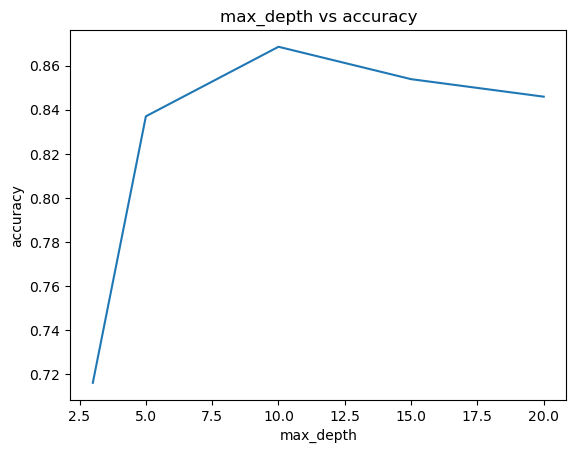

[0.7160404624277457, 0.8369460500963392, 0.8684971098265896, 0.8538053949903661, 0.8458574181117534]


In [40]:
max_depth = [3, 5, 10, 15, 20]
accuracy = []

for i in max_depth:
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))

plt.plot(max_depth, accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title('max_depth vs accuracy')
plt.show()

print(accuracy)

With the max depth of 10, its accuracy is the highest (about 87%)

# Random Forest
- 90%

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

rf_y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_y_pred))
print("Classification Report:\n", classification_report(y_test, rf_y_pred))

Accuracy: 0.9007707129094412
Confusion Matrix:
 [[486  35   2   1   0   0   0]
 [ 27 555  38   6   0   0   0]
 [  1  49 371  55   8   0   0]
 [  0  13  48 412  36   5   0]
 [  2   2  14  40 474  10   1]
 [  0   0   0   2  15 640   0]
 [  0   0   0   0   1   1 802]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       524
           1       0.85      0.89      0.87       626
           2       0.78      0.77      0.78       484
           3       0.80      0.80      0.80       514
           4       0.89      0.87      0.88       543
           5       0.98      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.90      4152
   macro avg       0.89      0.89      0.89      4152
weighted avg       0.90      0.90      0.90      4152



### Hyper Tuning: the best n_estimators for random forest

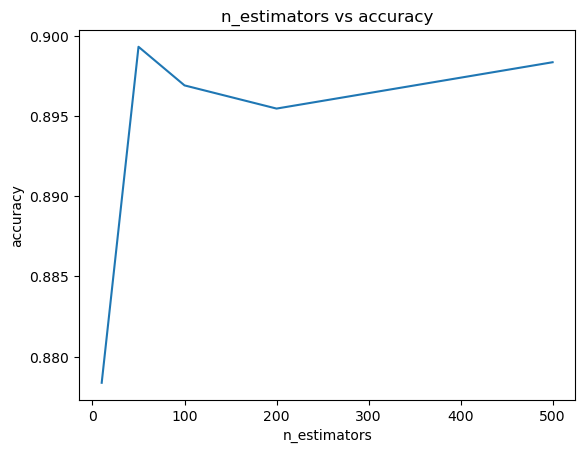

[0.8783718689788054, 0.899325626204239, 0.896917148362235, 0.8954720616570327, 0.8983622350674374]


In [41]:
n_estimators = [10, 50, 100, 200, 500]
accuracy = []

for i in n_estimators:
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train, y_train)
    rf_y_pred = rf.predict(X_test)
    accuracy.append(accuracy_score(y_test, rf_y_pred))

plt.plot(n_estimators, accuracy)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.title('n_estimators vs accuracy')
plt.show()

print(accuracy)

Without any hyper tuning, the general random forest has the highest accuracy with 90%

# Naive Bayes
- 70%

In [46]:
from sklearn.naive_bayes import BernoulliNB, GaussianNB

NB = BernoulliNB()
NB.fit(X_train, np.ravel(y_train))
NB_pred = NB.predict(X_test)

GAUSSmodel = GaussianNB()
GAUSSmodel.fit(X_train, np.ravel(y_train))
NGaussY_pred = GAUSSmodel.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, NB_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, NB_pred))

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, NGaussY_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, NGaussY_pred))

Accuracy: 0.5250481695568401
Confusion Matrix:
 [[217  93  16  25  89  65  19]
 [125 161  53  34 137  73  43]
 [ 78  50 103  12  89 124  28]
 [ 28  29  13  76 185 165  18]
 [  5   9  30  16 331 106  46]
 [  0   3   0  13 147 494   0]
 [  1   1   3   0   0   1 798]]
Accuracy: 0.697495183044316
Confusion Matrix:
 [[430  90   1   0   3   0   0]
 [168 343  61  20  24   0  10]
 [  8  89 176  60 141   0  10]
 [  1  41  34 163 256  17   2]
 [  2   1  20  40 377  97   6]
 [  0   0   1   5  46 605   0]
 [  0   0   1   0   0   1 802]]


GaussianNB has higher accuracy with about 0.7 than BernoulliNB but its accuracy is lower than others above, and hyper tuning for the model was not successful.

# **XGBoost**
- 91%

In [79]:
# XGBoost Algorithm
# !pip install xgboost
from xgboost import XGBClassifier

# XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Classification Report:", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report:               precision    recall  f1-score   support

           0       0.94      0.90      0.92       755
           1       0.86      0.89      0.88       907
           2       0.78      0.80      0.79       733
           3       0.80      0.78      0.79       763
           4       0.88      0.87      0.87       858
           5       0.97      0.98      0.97      1005
           6       0.99      1.00      1.00      1207

    accuracy                           0.90      6228
   macro avg       0.89      0.89      0.89      6228
weighted avg       0.90      0.90      0.90      6228

XGBoost Confusion Matrix: [[ 683   66    3    2    1    0    0]
 [  34  807   56   10    0    0    0]
 [   3   45  587   81   17    0    0]
 [   0   16   79  593   67    8    0]
 [   2    1   28   57  743   24    3]
 [   0    0    0    2   19  980    4]
 [   1    0    1    0    0    1 1204]]


Xgboost has quite higher accuracy (90%).

### Hyperparameter Tuning for xgboost

In [ ]:
# hyper tuning xgboost
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2, 0.3]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, verbose=3)

grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
grid_pred = grid.predict(X_test)

print("XGBoost Classification Report:", classification_report(y_test, grid_pred))
print("XGBoost Confusion Matrix:", confusion_matrix(y_test, grid_pred))

In [63]:
print(grid.best_params_)
print(grid.best_estimator_)

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 50}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)


In [62]:
# xgboost with the best parameters
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.05, max_depth=5, n_estimators=200)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Classification Report:", classification_report(y_test, y_pred_xgb))
print("XGBoost Confusion Matrix:", confusion_matrix(y_test, y_pred_xgb))

XGBoost Classification Report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94       524
           1       0.87      0.90      0.89       626
           2       0.79      0.78      0.78       484
           3       0.80      0.82      0.81       514
           4       0.90      0.87      0.89       543
           5       0.97      0.98      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.91      4152
   macro avg       0.90      0.90      0.90      4152
weighted avg       0.91      0.91      0.91      4152

XGBoost Confusion Matrix: [[489  32   2   1   0   0   0]
 [ 24 562  35   5   0   0   0]
 [  1  41 376  58   8   0   0]
 [  0   8  48 421  33   4   0]
 [  2   0  14  39 473  14   1]
 [  0   0   0   3  10 641   3]
 [  0   0   0   1   0   1 802]]


With the best parameters(eval_metric='logloss', learning_rate=0.05, max_depth=5, n_estimators=200), the accuracy is 91%

### With standardization

In [81]:
# hyper tuning xgboost

param_grid = {
    'max_depth': [3, 5, 10],
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2, 0.3]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'), param_grid, verbose=3)

grid.fit(X_train_st, y_train_st)

print(grid.best_params_)
print(grid.best_estimator_)
grid_pred_st = grid.predict(X_test_st)

print("XGBoost Classification Report:", classification_report(y_test_st, grid_pred_st))
print("XGBoost Confusion Matrix:", confusion_matrix(y_test_st, grid_pred_st))

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=10;, score=0.801 total time=   0.1s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=10;, score=0.831 total time=   0.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=10;, score=0.793 total time=   0.0s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=10;, score=0.798 total time=   0.0s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=10;, score=0.812 total time=   0.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=50;, score=0.835 total time=   0.2s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=50;, score=0.845 total time=   0.2s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=50;, score=0.847 total time=   0.4s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=50;, score=0.838 total time=   0.4s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=50;, score=0.857 total t

0.919 with learning_rate=0.2, max_depth=5, n_estimators=50;

In [75]:
# xgboost with the best parameters (standardized)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', learning_rate=0.2, max_depth=5, n_estimators=50)
xgb.fit(X_train_st, y_train_st)

# Predictions
y_pred_xgb_st = xgb.predict(X_test_st)

# Evaluation
print("XGBoost Classification Report:", classification_report(y_test_st, y_pred_xgb_st))
print("XGBoost Confusion Matrix:", confusion_matrix(y_test_st, y_pred_xgb_st))

XGBoost Classification Report:               precision    recall  f1-score   support

           0       0.95      0.94      0.94       524
           1       0.88      0.89      0.88       626
           2       0.78      0.78      0.78       484
           3       0.80      0.81      0.80       514
           4       0.90      0.88      0.89       543
           5       0.98      0.97      0.97       657
           6       1.00      1.00      1.00       804

    accuracy                           0.91      4152
   macro avg       0.90      0.89      0.90      4152
weighted avg       0.91      0.91      0.91      4152

XGBoost Confusion Matrix: [[490  31   2   1   0   0   0]
 [ 24 557  39   6   0   0   0]
 [  1  40 376  58   9   0   0]
 [  0   8  52 417  33   4   0]
 [  2   0  13  38 478  11   1]
 [  0   0   0   3  11 640   3]
 [  0   0   0   1   0   1 802]]


The result was the same, so stick to the xgboost model with the best parameters (standardized) with 0.2 test size.

# K-Nearest Neighbors (KNN) ~Error~

In [67]:
# K-Nearest Neighbors (KNN) Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Classification Report:", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

In [65]:
# K-Nearest Neighbors (KNN) Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print("KNN Classification Report:", classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:", confusion_matrix(y_test, y_pred_knn))

AttributeError: 'Flags' object has no attribute 'c_contiguous'

## KNN Improvement - Hyperparameter Tuning and Scaling 

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Creating a pipeline for scaling and KNN
pipe_knn = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(weights='distance'))
])

# Extended range of n_neighbors and trying different algorithms
param_grid_knn = {
    'knn__n_neighbors': range(3, 20),
    'knn__metric': ['euclidean', 'manhattan', 'minkowski'],
    'knn__algorithm': ['ball_tree', 'kd_tree', 'brute']
}

# GridSearchCV for KNN
grid_knn = GridSearchCV(pipe_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for KNN:", grid_knn.best_params_)
print("Best score for KNN:", grid_knn.best_score_)

KeyboardInterrupt: 

In [ ]:
# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model with best parameters
knn_best = KNeighborsClassifier(n_neighbors=4, metric='manhattan', algorithm='ball_tree')
knn_best.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn_best = knn_best.predict(X_test_scaled)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn_best)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_knn_best)
print("Classification Report:\n", class_report)

Confusion Matrix:
 [[1388  470]
 [ 798  236]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.75      0.69      1858
           1       0.33      0.23      0.27      1034

    accuracy                           0.56      2892
   macro avg       0.48      0.49      0.48      2892
weighted avg       0.53      0.56      0.54      2892



### Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Create a pipeline with standard scaling and KNN
knn_pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=4, algorithm='ball_tree', metric='manhattan'))
])

# Bagging ensemble of KNN
bagging_knn = BaggingClassifier(base_estimator=knn_pipeline, n_estimators=10, random_state=42)

# Fit the model
bagging_knn.fit(X_train, y_train)

# Evaluate the model
y_pred = bagging_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Bagging with KNN:", accuracy)


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy of Bagging with KNN: 0.5304287690179806


# Submisstion file

In [96]:
# Make predictions on the test set using the xgb model with the best parameters
y_pred = xgb.predict(test)

# Save the predictions to a CSV file
output = test[['id']]
output['NObeyesdad'] = y_pred
# NObeyesdad to original values
output['NObeyesdad'] = output['NObeyesdad'].map({0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'})
# save to csv
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


C:\Users\gangt\AppData\Local\Temp\ipykernel_27244\1992231642.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['NObeyesdad'] = y_pred
C:\Users\gangt\AppData\Local\Temp\ipykernel_27244\1992231642.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  output['NObeyesdad'] = output['NObeyesdad'].map({0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Overweight_Level_I', 3: 'Overweight_Level_II', 4: 'Obesity_Type_I', 5: 'Obesity_Type_II', 6: 'Obesity_Type_III'})
